# <font color='blue'> Table Of Contents </font>

### <font color='blue'> Thomson Reuters: Visual Data Analytics </font>

### <font color='blue'> Netflix And Amazon Kinesis Data Streams </font>

### <font color='blue'> Example Scenario: Toll Road Billing and Notification </font>

# <font color='blue'> Thomson Reuters: Visual Data Analytics </font>

Thomson Reuters is a leading source of information—including one of the world’s most trusted news organizations—for businesses and professionals.

Thomson Reuters built a solution to capture, analyze, and visualize analytics data generated by its digital products and services, to help continuously the user experience.

The solution uses Amazon Kinesis to deliver new events to user dashboards in less than 10 seconds, enabling them to:

* Take ownership of analytics data, and enrich it with document metadata.
* Monitor performance to detect and mitigate anomalies, before they impact customer experience.

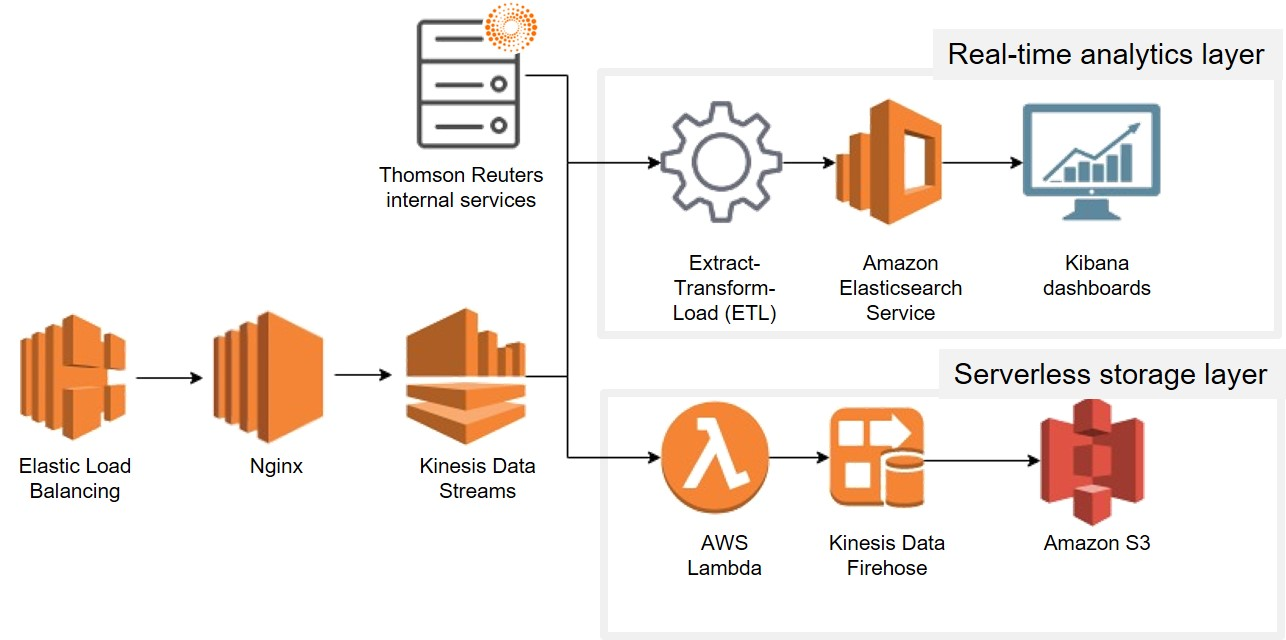

The initial event ingestion layer is composed of **Elastic Load Balancing** and customized NGINX web servers in an Auto Scaling group.

The ingestion layer hands off secured data to a streaming data pipeline composed of **Amazon Kinesis Streams**, **Amazon Kinesis Firehose**, and **AWS Lambda** serverless compute.

The Amazon Kinesis streaming-data pipeline automatically batches data and delivers it cost-effectively into a master data set for permanent storage in an **Amazon S3** bucket, replicated across regions.

Lambda runs code only when triggered by data via integrations with Kinesis and Amazon S3, and it charges for compute processing only when the code is running.

If events cannot immediately be dispatched from the ingestion layer to the data pipelines, a failover mechanism delivers them to Amazon S3, to be replayed when the system returns to normal operations.

A parallel real-time pipeline attached to the Amazon Kinesis stream delivers the events to a secure, multi-tenant Elasticsearch cluster through an ETL server connected to the Thomson Reuters Services platform.

## <font color='blue'> References </font>

1. Thomson reuters Case Study: AWS Kinesis - [https://aws.amazon.com/kinesis/case-study-thomson-reuters/](https://aws.amazon.com/kinesis/case-study-thomson-reuters/)
2. Thomson Reuters Case Study: AWS Solutions - [https://aws.amazon.com/solutions/case-studies/thomson-reuters/](https://aws.amazon.com/solutions/case-studies/thomson-reuters/)
3. Image: Thomson Reuters Visual Analytics Architecture - [https://d1.awsstatic.com/architecture-diagrams/ArchitectureDiagrams/thomson-reuters-architecture.89a1a2fdd620a395f44d233cd02237353fc68647.jpg](https://d1.awsstatic.com/architecture-diagrams/ArchitectureDiagrams/thomson-reuters-architecture.89a1a2fdd620a395f44d233cd02237353fc68647.jpg)

# <font color='blue'> Netflix And Amazon Kinesis Data Streams </font>

Monitoring and optimizing its network is critical for Netflix to continue improving customer experience, increasing efficiency, and reducing costs. 

In particular, Netflix needed a solution for ingesting, augmenting, and analyzing the multiple terabytes of data its network generates daily in the form of virtual private cloud (VPC) flow logs. 

The solution Netflix ultimately deployed—known internally as Dredge—centralizes flow logs using Amazon Kinesis Data Streams.

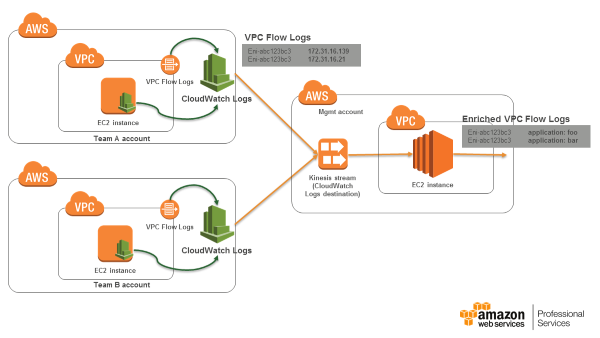

The application reads the data from Amazon Kinesis Data Streams in real time and enriches IP addresses with application metadata to provide a full picture of networking environment.

The enriched data lands in an open-source analytics application called Druid. Netflix uses the OLAP querying functionality of Druid to quickly slice data into regions, availability zones, and time windows to visualize it, and gain insight into how the network is behaving and performing.

The scalability of Amazon Kinesis Data Streams was a good fit for the Dredge application because of the cyclical and elastic nature of network usage at Netflix.

Netflix is now able to identify new ways to optimize its applications, whether that means moving an application from one region to another or changing to a more appropriate network protocol for a specific type of traffic. 

## <font color='blue'> References </font>

1. 1. Netflix And Amazon KInesius Case Study: AWS Solutions - [https://aws.amazon.com/solutions/case-studies/netflix-kinesis-data-streams/](https://aws.amazon.com/solutions/case-studies/netflix-kinesis-data-streams/)
2. Image: Netflix And AWS Kinesis Architecture - [https://d1.awsstatic.com/case-studies/US/netflix_arch_diagram.3cb585c874d3b012b57cbcad4bc0bf924a47ab78.png](https://d1.awsstatic.com/case-studies/US/netflix_arch_diagram.3cb585c874d3b012b57cbcad4bc0bf924a47ab78.png)

# <font color='blue'> Example Scenario: Toll Road Billing and Notification </font>

Consider a fictitious company, ABC Tolls, operates toll highways throughout the country.

* Customers that register with ABC Tolls receive a transceiver for their automobile.
* When the customer drives through the tolling area, a sensor receives information from the transceiver and records details of the transaction to a relational database.


A scheduled extract-transform-load (ETL) task processes the daily transactions and transforms them so they
can be loaded into their data warehouse.

ABC Tolls is also developing a new mobile application for its customers, with the following features:

* If a customer’s cumulative toll bill surpasses a spending account threshold, they send an in-application message to the customer to notify the breach within 10 minutes.

While monitoring their tolling stations, they want to be immediately notified when the vehicle traffic for a tolling station falls below a pre-defined threshold for each 30-minute period in a day.

ABC Tolls decide to build a streaming data ingestion and analytics system to support the requirements.

### <font color='blue'> Requirement 1: More Recent Data in the Data Warehouse </font>

ABC Tolls recognized that Kinesis Firehose can receive a stream of data records and insert them into Amazon Redshift, their current data warehouse solution.

They used the AmazonKinesis Agent on their servers to forward their log data to Kinesis Firehose. Since Kinesis Firehose uses Amazon S3 to store raw streaming data before it is copied to Amazon Redshift, there was no need to build another solution to archive raw data.

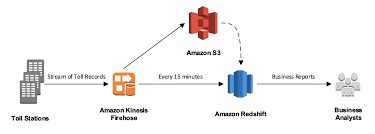

The figure below shows the flow of data for Amazon S3 destinations:

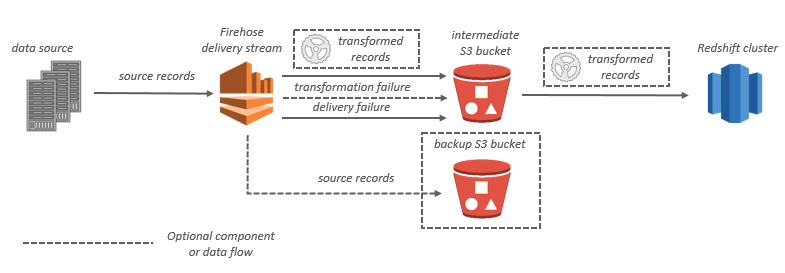

### <font color='blue'> Requirement 2: Billing Threshold Alerts </font>

To provide timely notifications, ABC Tolls needs to update the cumulative value in AWS Streaming Data Solutions on AWS with Amazon Kinesis.

The application allows customers to set their threshold, and the table stores this value for each customer, and compare it with the threshold to determine if a notification should be sent to the customer. 

Since their toll transactions are already streaming through Kinesis Firehose, they decided to use this streaming data as the source for their aggregation and alerting.

Kinesis Analytics totals the value of the transactions for each customer over a 10-minute time
period, and sends the totals to a Kinesis stream, which is the event source for an AWS Lambda function.

The Lambda function queries the DynamoDB table to retrieve the thresholds and current total spent by each customer, from the output of Kinesis Analytics.

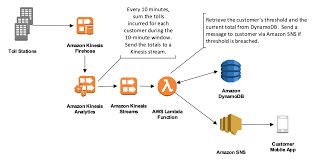

With Kinesis Analytics, you can process and analyze streaming data using SQL. The service enables you to quickly author and run powerful SQL code against streaming sources to perform time series analytics, feed real-time dashboards, and create real-time metrics.

* The service supports ingesting data from Kinesis Streams and Kinesis Firehose streaming sources.
* You then author your SQL code using the interactive editor and test it with live streaming data. 
* You can also configure destinations where you want Kinesis Analytics to persist the results.


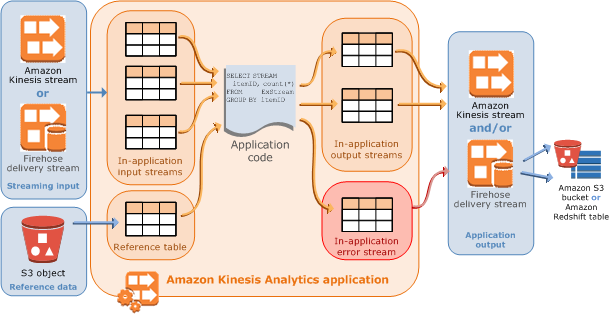

### <font color='blue'> Requirement 3: Other Threshold Alerts </font>

The ABC Tolls operators want to be immediately notified when the vehicle traffic for a tolling station falls
below a pre-defined threshold for each 30-minute period in a day.

To accomplish this, they created a file containing threshold traffic values for each 30-minute window, for each station, and Kinesis Analytics supports the use of reference data.

The developers wite SQL in their Kinesis Analytics application to count the number of vehicles seen at each
station over a 30-minute window, and compare those values with the thresholds
in the file. 

If the threshold was breached, Kinesis Analytics outputs a record to a Kinesis stream. When records arrive in the stream, a Lambda function is executed, which uses Amazon SNS to send a notification to AWS Tolls operators.

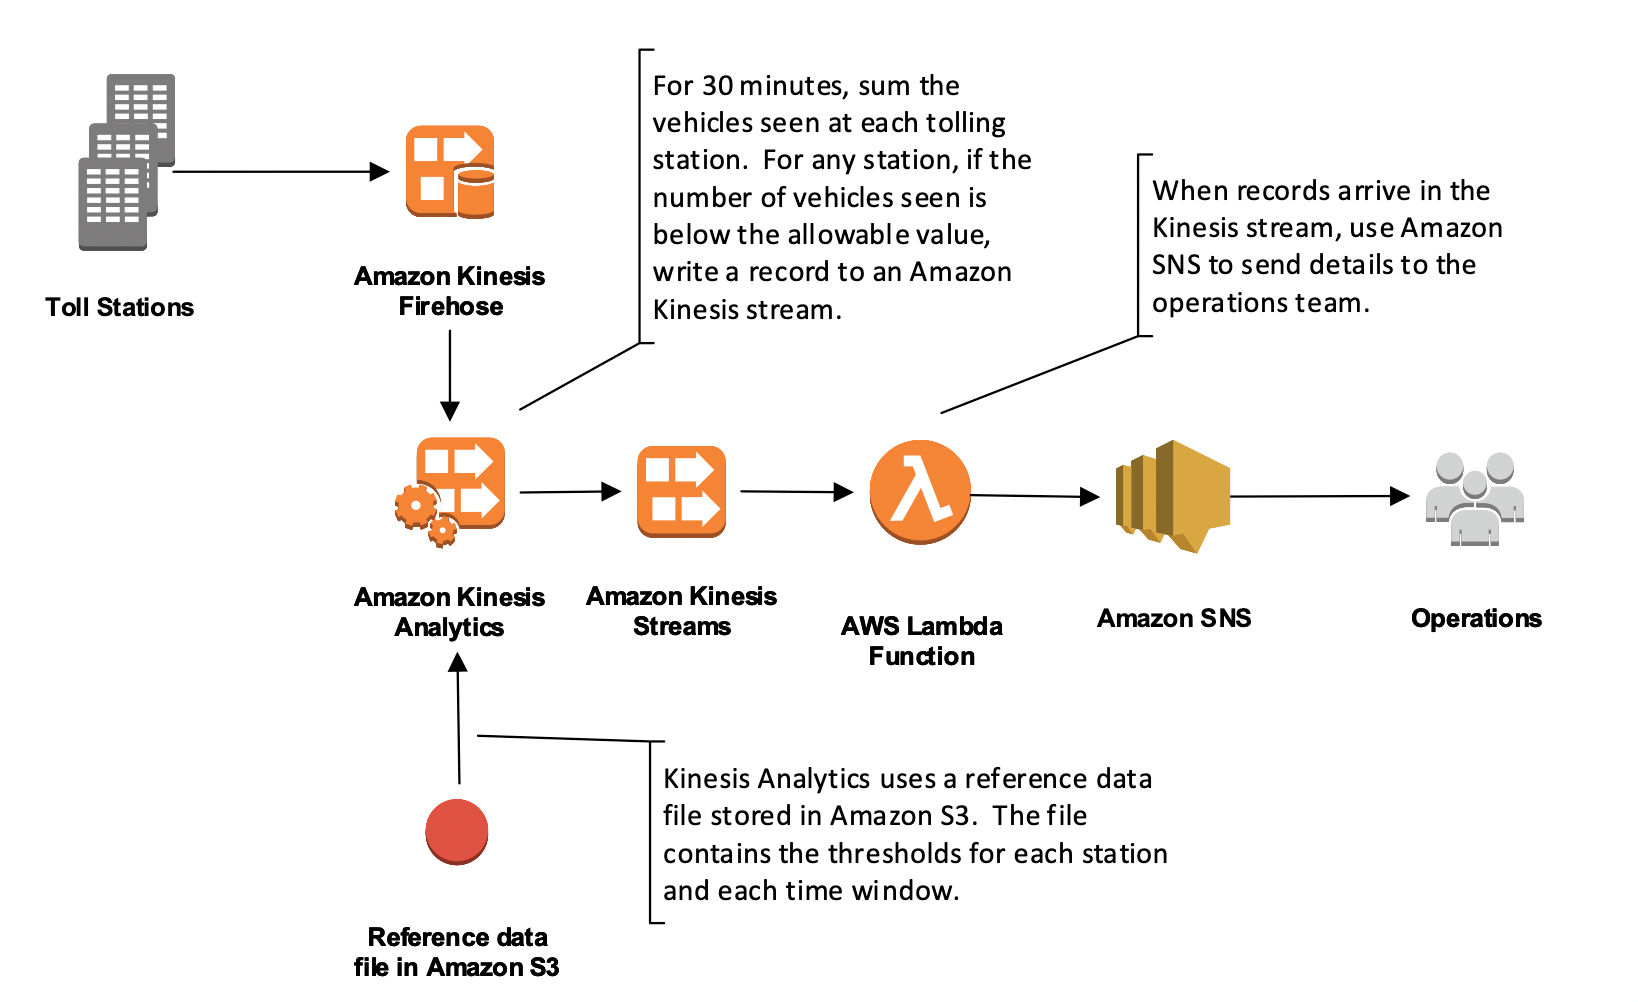

### <font color='blue'> The Overall Architecture Solution </font>

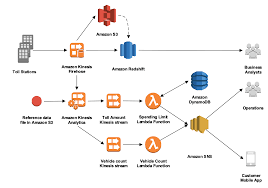

## <font color='blue'> References </font>

1. Streaming Data Solutions on AWS with Amazon Kinesis: AWS Whitepaper - [https://d1.awsstatic.com/whitepapers/whitepaper-streaming-data-solutions-on-aws-with-amazon-kinesis.pdf](https://d1.awsstatic.com/whitepapers/whitepaper-streaming-data-solutions-on-aws-with-amazon-kinesis.pdf)
2. Image: ABC Tolls AWS Data Warehousing Solution - [https://docs.aws.amazon.com/whitepapers/latest/streaming-data-solutions-amazon-kinesis/images/simage2.png](https://docs.aws.amazon.com/whitepapers/latest/streaming-data-solutions-amazon-kinesis/images/simage2.png)
3. Image: ABC Tolls Data Flow To S3 Destinations - [https://docs.aws.amazon.com/whitepapers/latest/streaming-data-solutions-amazon-kinesis/images/image5.png](https://docs.aws.amazon.com/whitepapers/latest/streaming-data-solutions-amazon-kinesis/images/image5.png)
4. Image: ABC Tolls Billing Alerts And Notifications Solution - [https://docs.aws.amazon.com/whitepapers/latest/streaming-data-solutions-amazon-kinesis/images/simage6.png](https://docs.aws.amazon.com/whitepapers/latest/streaming-data-solutions-amazon-kinesis/images/simage6.png)
5. Image: AWS Kinesis Analytics Architecture - [https://docs.aws.amazon.com/whitepapers/latest/streaming-data-solutions-amazon-kinesis/images/image8.png](https://docs.aws.amazon.com/whitepapers/latest/streaming-data-solutions-amazon-kinesis/images/image8.png)
6. Image: ABC Tolls - Other Alerts And Notifications - [https://docs.aws.amazon.com/whitepapers/latest/streaming-data-solutions-amazon-kinesis/images/simage8.png](https://docs.aws.amazon.com/whitepapers/latest/streaming-data-solutions-amazon-kinesis/images/simage8.png)
7. Image: ABC Tolls Overall Architecture Solution - [https://docs.aws.amazon.com/whitepapers/latest/streaming-data-solutions-amazon-kinesis/images/simage9.png](https://docs.aws.amazon.com/whitepapers/latest/streaming-data-solutions-amazon-kinesis/images/simage9.png)